##**Exercise 3**##

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import load_digits

## 4 Data Generation with QDA ##

In [ ]:
def create_numberdata(X, target, number1, number2, newlabel1, newlabel2, change_label=False):
    """
    Returns data where the targets only correspond to number1 or number2,
    furthermore the labels of the targets can be changed to newlabels
    """

    bool_1 = (target == number1)
    bool_2 = (target == number2)
    bool_1_2 = bool_1 + bool_2
    indices_1_2 = np.where(bool_1_2 == True)[0]
    X_new = X[indices_1_2, :]

    target_new = target[indices_1_2]

    if change_label:
        indices = np.where(target_new == number1)[0]
        target_new[indices] = newlabel1
        indices = np.where(target_new == number2)[0]
        target_new[indices] = newlabel2


    return(X_new, target_new)

In [ ]:
def fit_qda(training_features, training_labels):
    """
    Returns mus with shape (N_class x D), covariance matrices with shape
    (N_class x D x D) and the priors with shape (N_class)

    """
    # extracting data for each class
    indices_1 = np.where(training_labels == 0)[0]
    indices_2 = np.where(training_labels == 1)[0]
    N_1 = indices_1.shape[0]
    N_2 = indices_2.shape[0]
    N = training_labels.shape[0]
    train_feat_1 = training_features[indices_1, :]
    train_feat_2 = training_features[indices_2, :]

    # calculating mean
    mu_1 = np.mean(train_feat_1, axis=0)
    mu_2 = np.mean(train_feat_2, axis=0)
    mu = np.stack((mu_1, mu_2), axis=0)

    # calculating covariance matrix
    cov_1 = np.cov(train_feat_1.T)
    cov_2 = np.cov(train_feat_2.T)
    covmat = np.stack((cov_1, cov_2), axis=0)

    # calculating priors
    p = np.zeros(2)
    p[0] = N_1 / N
    p[1] = N_2 / N

    return(mu, covmat, p)

In [ ]:
# loading data
digits = load_digits ()
data = digits["data"]
target = digits["target"]

# only working with number1 and number2
number1 = 2
number2 = 8
X, y = create_numberdata(data, target, number1, number2, newlabel1=0, newlabel2=1, change_label=True)


mu, cov, p = fit_qda(X, y)

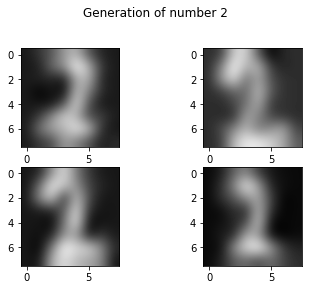

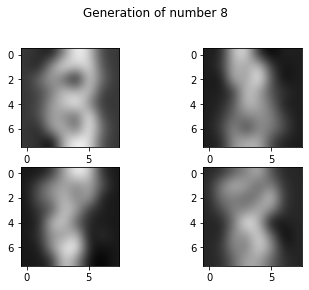

In [ ]:
interpolation = "bicubic"

# plotting number1
image1 = np.random.multivariate_normal(mu[0,:], cov[0,:,:], size = 4)

plt.figure(0)
plt.gray()
for i in range(4):
    img = image1[i,:].reshape((8,8))
    plt.subplot(2,2,i+1)
    plt.imshow(img, interpolation=interpolation)

plt.suptitle('Generation of number {0}'.format(str(number1)), va='bottom')
plt.show()

# plotting number2
image2 = np.random.multivariate_normal(mu[1,:], cov[1,:,:], size = 4)

plt.figure(1)
plt.gray()
for i in range(4):
    img = image2[i,:].reshape((8,8))
    plt.subplot(2,2,i+1)
    plt.imshow(img, interpolation=interpolation)

plt.suptitle('Generation of number {0}'.format(str(number2)), va='bottom')
plt.show()

We worked with numbers 2 and 8. As one can see the generation process of new numbers from the learnt probability distribution works quite well. But for example the second 8 does not look so good. This could be due to the possibility that also some features from a 2 are used for the generation of an 8.